# Lab2 - Recurrent Neural Network

- Imports :

In [272]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

- Générer X aléatoirement :

In [216]:
X = np.random.randint(2, size=(40,10))

- Calculer Y :

In [217]:
Y = np.sum(X, axis=1)

- Separer X,Y en X_train, X_test, Y_train, Y_test :

In [218]:
X_train = X[:30]
X_test = X[30:]

Y_train = Y[:30]
Y_test = Y[30:]

- Renseignement des dimensions/constantes :

In [235]:
# Nombre d'exemples d'entrainement
I = len(X_train)
print("I =", I)

# Longeur des séquences
T = X_train.shape[1]
print("T =", T)

# Valeur initiale de la fonction de propagation
F0 = 0
print("F0 =", F0)

# Nombre d'iteration
iteration = 10000
print("iteration =", iteration)

I = 30
T = 10
F0 = 0
iteration = 10000


In [236]:
def dataInit() :
    
    # Poids initial appliqué à F (avant la Back Propagation)
    Vf = np.random.rand()

    # Poids initial appliqué à X (avant la Back Propagation)
    Vx = np.random.rand()
    
    return Vf, Vx

def derivatedInit() :
    
    # Initialisation de la dérivée partielle de l'erreur par Vx
    dE_dVx_old = 0
    
    # Initialisation de la dérivée partielle de l'erreur par Vx
    dE_dVf_old = 0
    
    return dE_dVx_old, dE_dVf_old

- Fonction de Forward Propagation :

In [237]:
def FP(X, Vx, Vf):
    Ŷ = []
    F = []
    for X_i in X :
        f_i_0 = F0
        f = []
        for X_i_t in X_i:
            f_i_0 = Vf*f_i_0 + Vx*X_i_t
            f.append(f_i_0)
        F.append(f)
        Ŷ.append(f_i_0)
    return Ŷ, np.array(F)

- Calcul des dérivées partielles de l'erreur :

In [238]:
# Calcul de la dérivée partielle de E en fonction de Vx
def derErreurVx(Ŷ, X, Y, Vf) :
    dE_dVx = 0
    for t in range (1,T) :
        a = 0
        for i in range(len(X)) :
            a += (Ŷ[i]-Y[i])*X[i][t-1]
        dE_dVx += a*((Vf)**(T-t))
    return dE_dVx


# Calcul de la dérivée partielle de E en fonction de Vf
def derErreurVf(Ŷ, F, Y, Vf) :
    dE_dVf = 0
    for t in range (1,T) :
        c = 0
        for i in range(len(F)) :
            c += (Ŷ[i]-Y[i])*F[i][t-1]
        dE_dVf += c*((Vf)**(T-t))
    return dE_dVf

- Fonction de Back Propagation :

In [239]:
def BP(Ŷ, F, X_train, Y_train, Vx, Vf) :
    
    # Taux d'apprentissage associé à X (BP)
    𝛼_x = 0.001

    # Taux d'apprentissage associé à F (BP)
    𝛼_f = 0.001

    # Calcul des dérivées
    dE_dVx = derErreurVx(Ŷ, X_train, Y_train, Vf)
    dE_dVf = derErreurVf(Ŷ, F, Y_train, Vf)

    # Correction des poids 
    Vx -= 𝛼_x*dE_dVx

    Vf -= 𝛼_f*dE_dVf

    return Vx, Vf

- Entrainement avec le Back Propagation :

In [276]:
#Initialisation des données
Vf, Vx = dataInit()

for itera in range (iteration) :
    
    # Appel de la fonction de forward propagation
    Ŷ, F = FP(X_train, Vx, Vf)
    
    # Calcul de l'erreur 
    E = (1/2)*np.sum((Ŷ - Y_train)**2)
    
    # Appel de la fonction de back propagation
    Vx, Vf = BP(Ŷ, F, X_train, Y_train, Vx, Vf)

<ipython-input-237-792c62c9806d>:8: RuntimeWarning: overflow encountered in double_scalars
  f_i_0 = Vf*f_i_0 + Vx*X_i_t
<ipython-input-276-78992ba018cf>:10: RuntimeWarning: overflow encountered in square
  E = (1/2)*np.sum((Ŷ - Y_train)**2)
<ipython-input-238-1ee42b86e324>:7: RuntimeWarning: invalid value encountered in double_scalars
  a += (Ŷ[i]-Y[i])*X[i][t-1]
<ipython-input-238-1ee42b86e324>:18: RuntimeWarning: invalid value encountered in double_scalars
  c += (Ŷ[i]-Y[i])*F[i][t-1]
<ipython-input-238-1ee42b86e324>:19: RuntimeWarning: overflow encountered in double_scalars
  dE_dVf += c*((Vf)**(T-t))
<ipython-input-238-1ee42b86e324>:18: RuntimeWarning: overflow encountered in double_scalars
  c += (Ŷ[i]-Y[i])*F[i][t-1]


- Test du Back Propagation :

In [258]:
Ŷ, F = FP(X_test, Vx, Vf)
E = (1/2)*np.sum((Ŷ - Y_test)**2)

err = []

#for i in range(len(Ŷ)) :
    #print("Ŷ = ", Ŷ[i], " et Y = ", Y_test[i])
    
err.append(np.mean(np.abs((Y_test-Ŷ)/Y_test*100)))

- Représentation graphique :

- Fonction de Resilient Propagation :

In [259]:
def RP(Ŷ, F, X_train, Y_train, Vx, Vf, itera, dE_dVx_old, dE_dVf_old) :
    
   # Taux d'apprentissage associé à X (RP)
    Δ_x = 0.001

    # Taux d'apprentissage associé à F (RP)
    Δ_f = 0.001
    
    # Taux de correction avançant pour Δ (RP)
    ƞ_p = 1.2

    # Taux de correction reculant pour Δ (RP)
    ƞ_n = 0.5
    
    dE_dVx = derErreurVx(Ŷ, X_train, Y_train, Vf)
    dE_dVf = derErreurVf(Ŷ, F, Y_train, Vf)
        
    # Correction des poids 
    
    if itera == 0 : # Si c'est le premier tour
        Vx -= Δ_x * dE_dVx
        Vf -= Δ_f * dE_dVf
        
    else : # Pour tous les autres tours
        
        # Correction de Δ_x
        if np.sign(dE_dVx) == np.sign(dE_dVx_old) :
            Δ_x = Δ_x*ƞ_p
        else :
            Δ_x = Δ_x*ƞ_n
        
        # Correction de Δ_x
        if np.sign(dE_dVf) == np.sign(dE_dVf_old) :
            Δ_f = Δ_f*ƞ_p
        else :
            Δ_f = Δ_f*ƞ_n
            
        Vx -= Δ_x*np.sign(dE_dVx)
        Vf -= Δ_f*np.sign(dE_dVf)
    
    return Vx, Vf, dE_dVx, dE_dVf

- Entrainement avec le Resilient Propagation :

In [278]:
#Initialisation des données
Vf, Vx = dataInit()
dE_dVx_old, dE_dVf_old = derivatedInit()

Erreur = []
for itera in range (iteration) :
    
    # Appel de la fonction de forward propagation
    Ŷ, F = FP(X_train, Vx, Vf)
    
    # Calcul de l'erreur 
    E = (1/2)*np.sum((Ŷ - Y_train)**2)

    # Appel de la fonction de resilient propagation
    Vx, Vf, dE_dVx_old, dE_dVf_old = RP(Ŷ, F, X_train, Y_train, Vx, Vf, itera, dE_dVx_old, dE_dVf_old)
    
    # Ajout de l'erreur à la liste Erreur
    Erreur.append(E)

- Test du Resilient Propagation :

In [261]:
Ŷ, F = FP(X_test, Vx, Vf)
E = (1/2)*np.sum((Ŷ - Y_test)**2)

#for i in range(len(Ŷ)) :
    #print("Ŷ = ", Ŷ[i], " et Y = ", Y_test[i])
    
err.append(np.mean(np.abs((Y_test-Ŷ)/Y_test*100)))

- Représentation graphique :

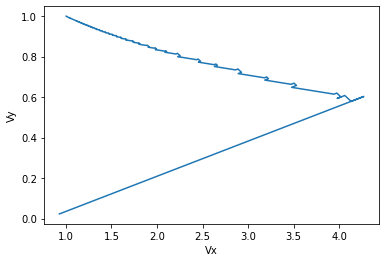

In [279]:
fig, ax = plt.subplots()
ax.plot(VX, VF)
ax.set(xlabel='Vx', ylabel='Vy')
fig.savefig("test.png")
plt.show()

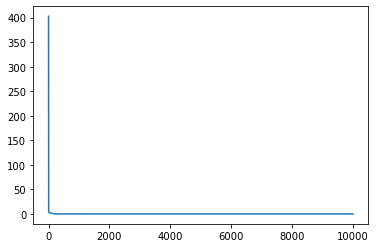

In [280]:
plt.plot(Erreur)
plt.show()

- Fonction de Gradient Clipping :

In [264]:
def GC(Ŷ, F, X_train, Y_train, Vx, Vf) :
    
    # Norme (GC)
    ƞ = 10
    
    # Taux d'apprentissage associé à X (BP)
    𝛼_x = 0.001

    # Taux d'apprentissage associé à F (BP)
    𝛼_f = 0.001
    
    # Calcul des dérivées
    dE_dVx = derErreurVx(Ŷ, X_train, Y_train, Vf)
    dE_dVf = derErreurVf(Ŷ, F, Y_train, Vf)
    
    # Definition du vecteur gradient
    dE_dV = [dE_dVx, dE_dVf]
        
    # Calcul de la norme du vecteur gradient
    norm = np.linalg.norm([dE_dVx, dE_dVf])

    # Bornage de la norme du gradient
    if norm > ƞ :
        dE_dV = ƞ * ([dE_dVx, dE_dVf] / norm)

    # Correction des poids
    Vx -= 𝛼_x*dE_dV[0]
    Vf -= 𝛼_f*dE_dV[1]

    return Vx, Vf, norm

- Entrainement avec le Gradient Clipping :

In [265]:
#Initialisation des données
Vf, Vx = dataInit()
dE_dVx_old, dE_dVf_old = derivatedInit()

# Création d'une liste d'erreur pour le graphe
Erreur = []

for itera in range (iteration) :
    
    # Appel de la fonction de forward propagation
    Ŷ, F = FP(X_train, Vx, Vf)
    
    # Calcul de l'erreur 
    E = (1/2)*np.sum((Ŷ - Y_train)**2)

    # Appel de la fonction de resilient propagation
    Vx, Vf, norm = GC(Ŷ, F, X_train, Y_train, Vx, Vf)
    
    # Ajout de l'erreur à la liste Erreur
    Erreur.append(E)

- Test du Gradient Clipping :

In [266]:
Ŷ, F = FP(X_test, Vx, Vf)
E = (1/2)*np.sum((Ŷ - Y_test)**2)

#for i in range(len(Ŷ)) :
    #print("Ŷ = ", Ŷ[i], " et Y = ", Y_test[i])
    
err.append(np.mean(np.abs((Y_test-Ŷ)/Y_test*100)))

- Représentation graphique :

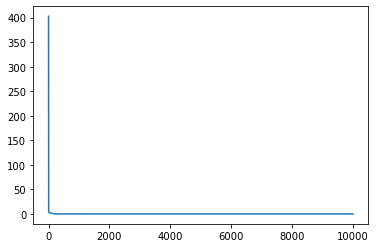

In [281]:
plt.plot(Erreur)
plt.show()

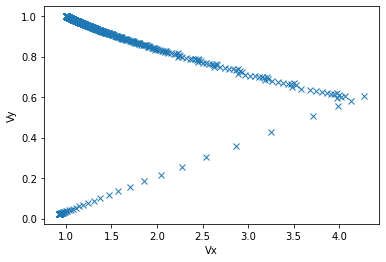

In [282]:
fig, ax = plt.subplots()
ax.plot(VX, VF, 'x')
ax.set(xlabel='Vx', ylabel='Vy')
fig.savefig("test.png")
plt.show()

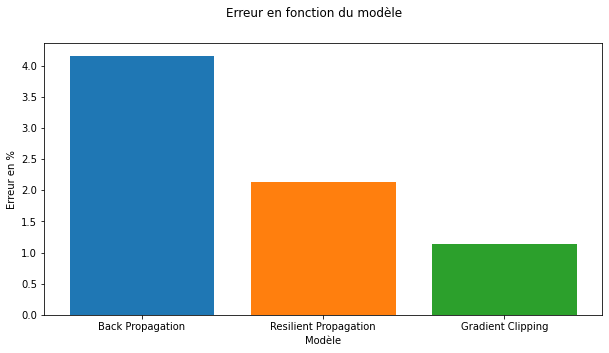

In [283]:
plt.figure(figsize=(10, 5))
plt.bar(['Back Propagation', 'Resilient Propagation', 'Gradient Clipping'],err, color=mcolors.TABLEAU_COLORS)
plt.suptitle('Erreur en fonction du modèle')
plt.xlabel("Modèle")
plt.ylabel("Erreur en %")
plt.show()